### Import the Data

In [313]:
import pandas as pd
import numpy as np
import pickle
data = pd.read_pickle('raw_data/all_features.pkl')
df = data.loc['2017-07-08':'2018-07-08']

X = df.drop('prices',axis=1)
y_values = df.prices

X.head()

,tweets,worldwide_interest,close,commits,transactions,transaction_fees,address
dates,,,,,,,
2017-07-08,41417.105263,9.857143,149.073333,3.0,220670.0,2.191,540203.0
2017-07-09,41327.578947,10.000000,151.386667,7.0,187986.0,2.124,456471.0
2017-07-10,41238.052632,10.285714,153.700000,7.0,251525.0,2.006,653136.0
2017-07-11,41148.526316,10.571429,155.880000,8.0,265586.0,1.830,686794.0
2017-07-12,41059.000000,10.857143,162.510000,13.0,256961.0,2.025,629432.0


In [314]:
def print_predictions(model,df):
    rind = np.random.randint(0, len(df), size=(10,))
    predictions = model.predict(df.iloc[rind, 1:].values)
    for index, i in enumerate(rind):
        prediction, actual = predictions[index], df.iloc[i,0]
        print(f"{prediction:6.4f}, {actual:6.4f}, {(prediction-actual):6.4f}")

    return None

def print_predictions_transformation(model,df):
    rind = np.random.randint(0, len(df), size=(10,))
    predictions = model.predict(df.iloc[rind, 1:].values)
    for index, i in enumerate(rind):
        prediction, actual = np.exp(predictions[index] + 0.5*np.var(predictions[index])), df.iloc[i,0]
        print(f"{prediction:6.4f}, {actual:6.4f}, {(prediction-actual):6.4f}")

    return None

def train_and_fit(X,y,mtype):
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3,random_state=42)
    if mtype == 'Linear':
        fit = LinearRegression().fit(X_train, y_train)
    elif mtype == 'OLS':
        fit = sm.OLS(y_train,sm.add_constant(X_train)).fit()   
    elif mtype == 'LassoCV':
        fit = LassoCV(cv=10).fit(X_train, y_train)
    elif mtype == 'RidgeCV':
        fit = RidgeCV(cv=10).fit(X_train,y_train)
    elif mtype == 'Polynominal':
        fit = make_pipeline(PolynomialFeatures(2), LinearRegression())
    else:
        print("mtype not found")
        
        
    results = model.score(X_train, y_train)     
    return X_train,X_test,y_train,y_test, fit


### Visualize the Correlations

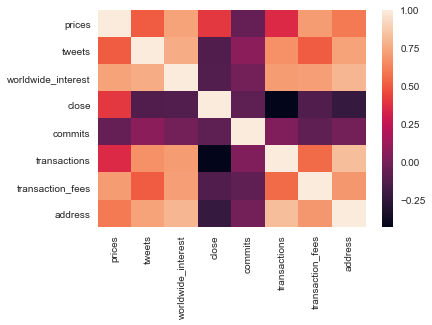

In [315]:
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import statsmodels.api as sm

corr = df.corr()
sns.heatmap(corr)

(0, 20000)

<Figure size 864x576 with 0 Axes>

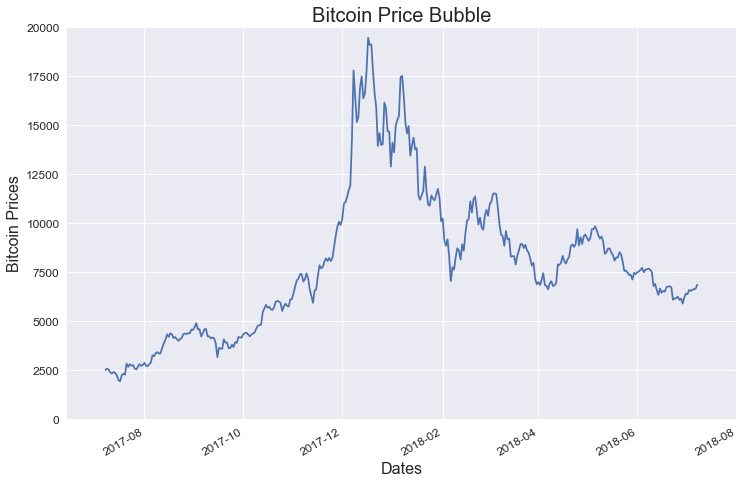

In [316]:
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date,timedelta
from dateutil.relativedelta import relativedelta
date_min = test_df.dates.min()-timedelta(days=24)
date_max = test_df.dates.max()+timedelta(days=24)

test_df = df.reset_index()

def normalize_dataframe(x):
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

fig = plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
plt.plot_date(test_df['dates'], test_df['prices'], 'b-',label = 'prices')
fig.autofmt_xdate()
plt.xlabel('Dates', size = 16)
plt.ylabel('Bitcoin Prices', size = 16)
plt.title('Bitcoin Price Bubble', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
axes = plt.gca()
axes.set_xlim([date_min,date_max])
axes.set_ylim([0,20000])

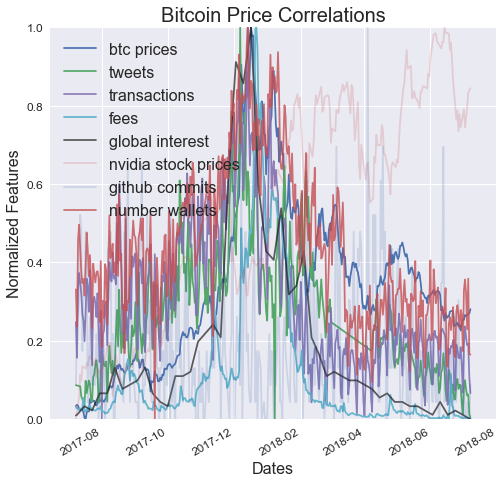

In [317]:

fig = plt.figure(figsize=(8,8))


plt.plot_date(test_df['dates'], normalize_dataframe(test_df['prices']), 'b-',label = 'btc prices')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['tweets']), 'g-',label = 'tweets')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['transactions']), 'm-',alpha=0.9,label = 'transactions')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['transaction_fees']), 'c-',alpha=1.0,label = 'fees')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['worldwide_interest']), 'k-',alpha=0.7,label = 'global interest')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['close']), 'r-', alpha=0.2,label = 'nvidia stock prices')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['commits']), 'b-', alpha=0.2,label = 'github commits')
plt.plot_date(test_df['dates'], normalize_dataframe(test_df['address']), 'r-', alpha=0.8,label = 'number wallets')

fig.autofmt_xdate()
legend = plt.legend(fontsize=16)
plt.xlabel('Dates', size = 16)
plt.ylabel('Normalized Features', size = 16)
plt.title('Bitcoin Price Correlations', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
axes = plt.gca()
axes.set_xlim([date_min,date_max])
axes.set_ylim([0,1])
frame = legend.get_frame()
frame.set_color('white')

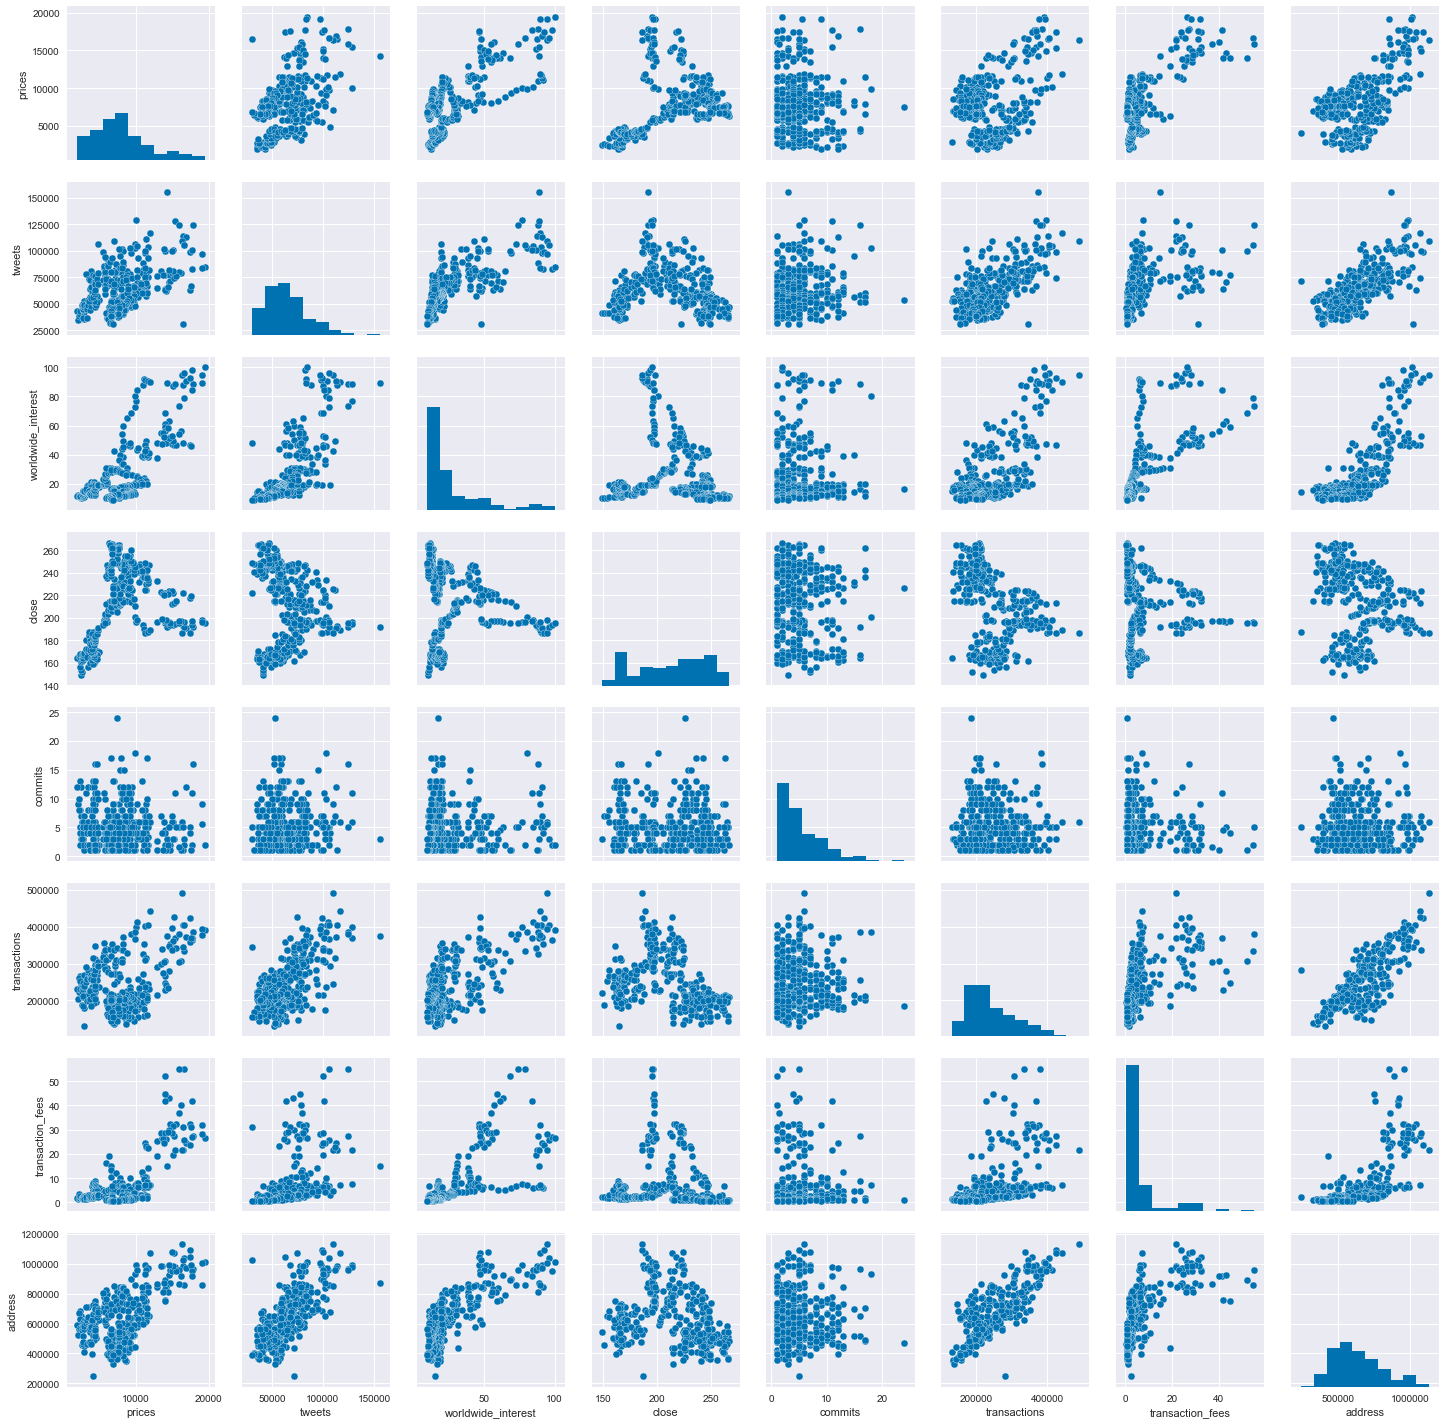

In [318]:
sns.pairplot(df)

### Standard Linear Regression

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import warnings
from sklearn.cross_validation import cross_val_score
warnings.filterwarnings("ignore", category=DeprecationWarning) 

lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.3, random_state=42)
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring = 'r2')
print(np.average(scores))

0.8699828346676994


In [279]:
#Summarize the data
model = lr.fit(X_train, y_train)
sm_model = sm.OLS(y_train,sm.add_constant(X_train)).fit()
score = model.score(X_train, y_train) 
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     278.5
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          1.29e-113
Time:                        06:57:42   Log-Likelihood:                -2196.7
No. Observations:                 256   AIC:                             4409.
Df Residuals:                     248   BIC:                             4438.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8850.8675    943.891     -9.377      0.000   -1.07e+04   -6991.802
tweets                -0.0213      0.007     -3.101      0.002      -0.035      -0.008
worldwide_interest    89.8818      7.845     11.458      0.000      74.431     105.332
close                 61.4918      3.152     19.508      0.000      55.283      67.700
commits               37.7771     21.400      1.765      0.079      -4.373      79.927
transactions          -0.0052      0.003     -2.012      0.045      -0.010      -0.000
transaction_fees     143.3217     11.811     12.135      0.000     120.060     166.583
address                0.0045      0.001      3.994      0.000       0.002       0.007
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.230
Skew:                           0.073   Prob(JB):                        0.891
Kurtosis:                       3.004   Cond. No.                     8.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Seems like a decent r^2, So can I predict the price of BTC on a given day?

In [280]:
print_predictions(model,df)

4573.5590, 4332.8200, 240.7390
4403.2427, 4089.0100, 314.2327
4573.5590, 4332.8200, 240.7390
2612.8068, 4073.7900, -1460.9832
7748.3303, 7164.4800, 583.8503
14273.4852, 15477.2000, -1203.7148
6926.7885, 7999.3300, -1072.5415
13275.2025, 13836.1000, -560.8975
8525.9490, 7766.0300, 759.9190
12285.9394, 11315.4000, 970.5394


#### Not yet...

### What's going on with the model?

Text(0.5,1,'Residual plot')

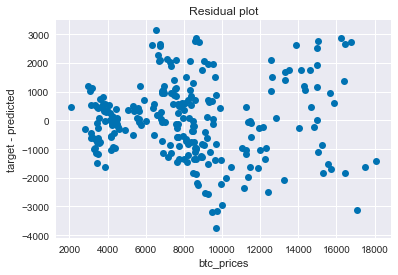

In [319]:
# Residual plot: plot residuals vs predicted# Residu 
predict = model.predict(X_train)
residual = y_train - predict
plt.plot(predict,residual,'o')
plt.xlabel('btc_prices')
plt.ylabel('target - predicted')
plt.title("Residual plot")

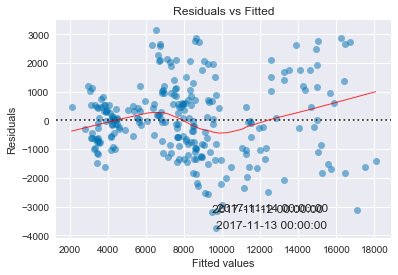

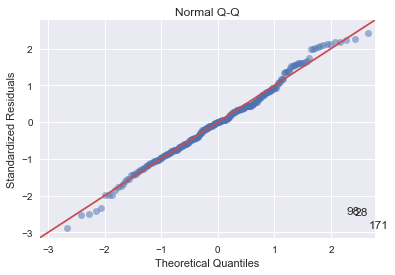

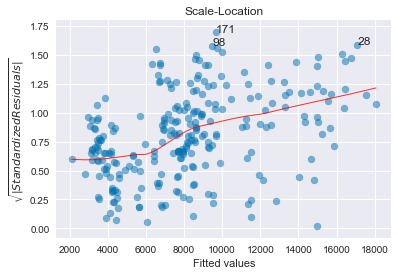

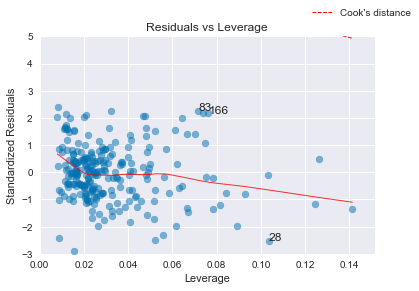

In [320]:
import diagnostic_plots

(diagnostic_plots.diagnostic_plots(X_train,y_train,sm_model))

#### hmmmm..... 

### Transformation and Feature Engineering

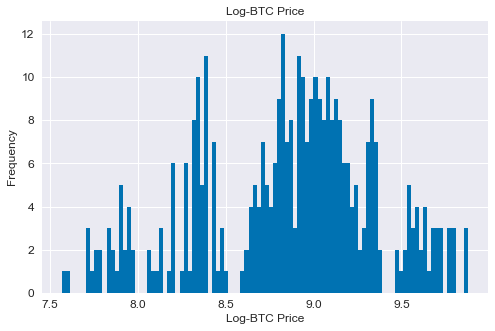

In [321]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
plt.hist(np.log(df['prices']),bins=100) 
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylabel('Frequency',size=12)
plt.xlabel('Log-BTC Price',size=12)
plt.title('Log-BTC Price',size=12)
savestr = 'figures/log_btc_histogram.svg'
fig.savefig(savestr,dpi=300)

In [322]:
# Try to log-transformed the price
y_trans = np.log(df.prices)
X_trans = X

In [323]:
X_train, X_test, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.3,random_state=42)
## cross validation model 
model_trans = LinearRegression().fit(X_train, y_train_trans)
results_trans = model_trans.score(X_train, y_train_trans)

In [324]:
scores = cross_val_score(model_trans, X_train, y_train_trans, cv=10)
print(np.average(scores))

0.8650042433015542


In [325]:
#Summarize the data
sm_model_trans = sm.OLS(y_train,sm.add_constant(X_train)).fit()
sm_model_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 prices   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     278.5
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          1.29e-113
Time:                        16:07:28   Log-Likelihood:                -2196.7
No. Observations:                 256   AIC:                             4409.
Df Residuals:                     248   BIC:                             4438.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8850.8675    943.891     -9.377      0.000   -1.07e+04   -6991.802
tweets                -0.0213      0.007     -3.101      0.002      -0.035      -0.008
worldwide_interest    89.8818      7.845     11.458      0.000      74.431     105.332
close                 61.4918      3.152     19.508      0.000      55.283      67.700
commits               37.7771     21.400      1.765      0.079      -4.373      79.927
transactions          -0.0052      0.003     -2.012      0.045      -0.010      -0.000
transaction_fees     143.3217     11.811     12.135      0.000     120.060     166.583
address                0.0045      0.001      3.994      0.000       0.002       0.007
==============================================================================
Omnibus:                        0.294   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.863   Jarque-Bera (JB):                0.230
Skew:                           0.073   Prob(JB):                        0.891
Kurtosis:                       3.004   Cond. No.                     8.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Residual plot')

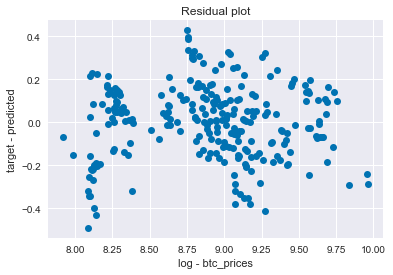

In [326]:
# Residual plot: plot residuals vs predicted# Residu 
predict = model_trans.predict(X_train)
residual = y_train_trans - predict
plt.plot(predict,residual,'o')
plt.xlabel('log - btc_prices')
plt.ylabel('target - predicted')
plt.title("Residual plot")

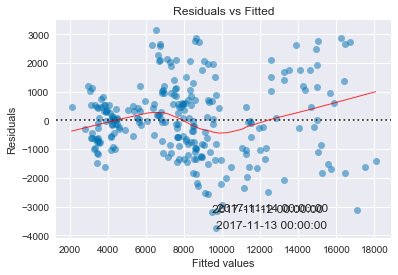

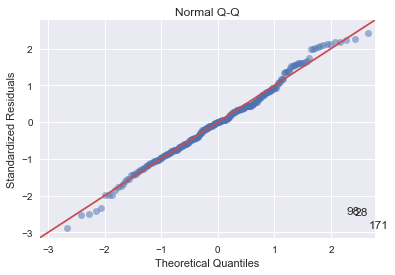

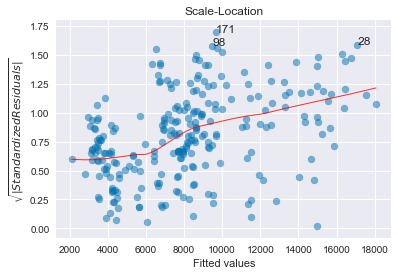

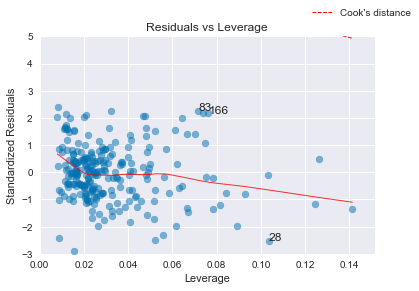

In [327]:
(diagnostic_plots.diagnostic_plots(X_train,y_train,sm_model_trans))

### r^2 = 0.95 How about the predictions now??

In [328]:
print_predictions_transformation(model_trans,df) # exp(x + 1/2(var(x)))

7504.9551, 7944.4300, -439.4749
3986.4658, 4168.8800, -182.4142
8816.7195, 9796.4200, -979.7005
6366.4573, 8925.0600, -2558.6027
3287.1814, 3373.8200, -86.6386
5525.7605, 5464.1600, 61.6005
11787.3614, 9906.7900, 1880.5714
12654.5274, 11174.9000, 1479.6274
11504.4060, 14695.8000, -3191.3940
10556.8661, 11082.7000, -525.8339


Not terrible, not great....

### Scaling

In [329]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
X_train_scaled = ss_x.fit_transform(X_train)
X_test_scaled = ss_x.transform(X_train)


model_trans.fit(X_train_scaled, y_train)
model_trans.score(X_train_scaled, y_train)

0.8871469459989814

In [330]:
scores = cross_val_score(model_trans, X_train_scaled, y_train, cv=10, scoring = 'r2')
np.average(scores)

0.8699828346677794

### Regularization 

In [331]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso

#### Let's try Ridge Cross-Validation first 

In [332]:
rcv = RidgeCV(cv=10)
rcv.fit(X_train_scaled, y_train)
rcv.score(X_train_scaled, y_train)

0.887128093924459

In [333]:
zipped=zip(X.columns,rcv.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features

[('worldwide_interest', 1947.2336098295734),
 ('close', 1899.3960493014083),
 ('transaction_fees', 1537.0737564910437),
 ('address', 778.930560271485),
 ('commits', 144.17469826674255),
 ('transactions', -351.9411679115997),
 ('tweets', -411.46571675831973)]

In [334]:
lcv = LassoCV(cv=10)
lcv.fit(X_train_scaled, y_train)
lcv.score(X_train_scaled, y_train)

0.88713390935412

In [335]:
zipped=zip(X.columns,lcv.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features

[('worldwide_interest', 1958.7557658286294),
 ('close', 1905.6955991268835),
 ('transaction_fees', 1539.0665240467263),
 ('address', 764.515952644702),
 ('commits', 142.2484214639713),
 ('transactions', -342.9741882933834),
 ('tweets', -414.2867022103232)]

#### Should remove commits and re-run the model

### Polynominal Models 

In [336]:
from sklearn.pipeline import make_pipeline

In [338]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso

poly_reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_reg.fit(X_train, y_train)
poly_reg.score(X_test, y_test)

0.9331812388276288

## Follow on Models
Based on the data, we can explore feature engineering more in depth.  
See the next notebook- 'Main_Regession_Driver' 
The final transformation ends up being as follows:
Boxcox anything that appears skewed
1) transactions
2) tweets
3) wallet addresses
Log anything that appears to have a 1/x distribution
1) btc price
2) nvidia stock price
3) transaction fees
4) global interest

Note, even with these transformations, there will be non- linearity
in the model